# Group 4 Project (Diabetes Dataset in 130 US Hospital from 1999-2008)

Team members: Kok Jie Wei Jeviene, Lim Yu Qi Cherlyn, Choh Hong Guan Benedict, Wong Kong Len, Chua Rui Hui <br><br>
Our team has decided to look at a diabetes dataset for this project. <br> <br>
Diabetes is considered a multi-factorial disorder and according 2016 statistics published by the World health Organisation, it is considered to be one of the top 10 causes of death in upper-middle-income countries. As diabetes, specifically Type II Diabetes, is considered a lifestyle disease, it can be preventable and managable under the right conditions. Furthermore, given that people are always looking to improve their quality of life, analysing datasets on diabetes may provide some useful insights and could potentially contribute to improvements in efficiency and effectiveness in healthcare services. <br>

The team has chosen to use a dataset from the US as compared to other developed countries, the US has the highest prevalence of diabetess. More information about this dataset can be found in the first blue box below. <br>


<div class="alert alert-info" role="alert">
  Dataset obtained from UCI MACHINE LEARNING RESPOSITORY: <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008" class="alert-link">Diabetes US HOSPITAL: UCI Machine Learning Datasets</a>. 
    <br> <br>
    Link to dataset: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/00296/" class="alert-link">Dataset Diabetes</a>.
    <br> <br>   
    Dataset is in .csv format
    <br> <br>
    The dataset also covers the following information which we would be using for our analysis. <br>
    <ol>
      <li>It is an inpatient encounter (a hospital admission).</li>
      <li>It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.</li>
      <li>The length of stay was at least 1 day and at most 14 days.</li>
      <li>Laboratory tests were performed during the encounter.</li> 
      <li>Medications were administered during the encounter.</li> 
    </ol>  
</div>




The team aims to do look at the following trends and outcomes from the dataset: 
1. Number of males to females with diabetes who got admitted in US
2. Relationship between age and admission. Can be viewed as categorical data.
3. Does race play a role, e.g. do Caucasians admit themselves more often?

Following which, the team would attempt to build a machine learning model to understand how several factors, including age, number of diagnosis, can affect the probability of readmission. 

We will import the following libraries for our Data Cleaning and Visualisation
- **pandas**
- **numpy**
- **matplotlib**
- **seaborn**


### _Comments_

* Certainly an interesting dataset.  
* You can possibly build many data visualizations to gain and present insights.  Will make interesting presentation.
* If time permits, you can also build predictive model (e.g. decision tree) with diagnosis as target
* This will help predict if a person is prone to have diabetes give the other conditions captured in the dataset
* You can format the notebook with subtitles to follow the various sections suggested - e.g. problem definition, research hypothesis, etc.

Chinlock


<div class="alert alert-success">
    
**<u>I. Problem Statement / Research Topic (2 Marks)</u>**

- What research topic are you going to address? Why are you interested to research on this topic in this region/country? Why is this topic interesting to you or why are you passionate to research on this topic?

[2 marks]
    
**<u>II. Dataset and Data Preperation (2 Marks)</u>**
- Please provide the <u>name and URL of the data portal</u> and the <u>name and URL of the source dataset(s)</u> that you intend to research on. Also, where necessary, explain what datasets have you tried and why did you reject them in favour of your selected dataset? 
- Please also provide the structure of the original dataset. What is the range of values (years, categories etc.) covered? How is it provided to you (CSV, Excel etc.)? In a short paragraph, what is this dataset about?

[2 marks]
    
**<u>III. Methodology (3 Marks)</u>**
- What steps did you use to clean the data / transpose the data so that it appears in a usable form for analysis? Did you fill in empty datapoints, or merge datasets, or aggregate them? 
- What EDA techniques did you use? Why did you select these techniques? Did the results surprise you?
- What data visualisation techniques did you use, where necessary? If you used data visualisation techniques, explain the graph and ensure you label them sufficiently (title, axes, legend etc.)
- Where necessary, did you use a machine learning technique? If yes, what did you use and what did you intend to find out? What was the result of the machine learning technique?

[2.5 marks]
    
**<u>IV. Insights / Evluation (3 marks)</u>**
- After performing EDA, what insights did you gain from the analysis? What did you learn from the analysis? 
- What are the possible future research efforts after showing your peers this report? What other future research would you like to do, knowing the results now?

[2.5 marks]

[Total = 9 / 10 marks]
</div>
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the warning messages that could appear during data cleaning
import warnings
warnings.filterwarnings('ignore')

## 0. Data Cleaning and Manipulation

We will first import the dataset into `all_data_df` with `pd.read_csv("diabetic_data.csv")`



In [2]:
all_data_df = pd.read_csv("diabetic_data.csv")

Check each columns for their unique values

In [3]:
column_list = all_data_df.columns.tolist()
for item in column_list:
    print(item)
    print(all_data_df[item].unique())

encounter_id
[  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedic

With the help of `.unique()` function, we haved noticed that the following columns contains **"?"** which is the missing value:
1. race
2. weight
3. payer_code
4. medical_specialty
5. diag_2
6. diag_3

We will replace **"?"** with **NaN** value instead and save the transformed dataset in a new dataframe `all_data_convert_df`

Save the transformed dataset, with both the numeric and non-numerical data as a new CSV file as `data_converted.csv`. 


In [4]:
def convert_to_na(value):
    if value == "?":
        return np.nan
    else:
        return value
    
list1 = ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_2','diag_3']

# Ben: Made a 'for' loop to make it less clunky. It does the same thing as below. 
for item in list1:
    all_data_df[item] = all_data_df[item].apply(convert_to_na)

all_data_convert_df = all_data_df
all_data_convert_df.to_csv("data_converted.csv",index =  False)

# all_data_df["race"] = all_data_df["race"].apply(convert_to_na)
# all_data_df["weight"] = all_data_df["weight"].apply(convert_to_na)
# all_data_df["payer_code"] = all_data_df["payer_code"].apply(convert_to_na)
# all_data_df["medical_specialty"] = all_data_df["medical_specialty"].apply(convert_to_na)
# all_data_df["diag_2"] = all_data_df["diag_2"].apply(convert_to_na)
# all_data_df["diag_3"] = all_data_df["diag_3"].apply(convert_to_na)

In [5]:
all_data_convert_df = pd.read_csv("data_converted.csv")
print(all_data_convert_df.shape)
all_data_convert_df.isnull().sum()

(101766, 50)


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

We will drop columns with 90% of missing values. This helps to clean the data

In [6]:
all_data_new_df = all_data_convert_df.dropna(axis=1, thresh=int(0.90*len(all_data_convert_df)))
display(all_data_new_df.head())

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<div class="alert alert-info">

Now that the data is clean, the team looks to further identify any trends in the data which may help to focus the scope of this project.

The team is looking at 3 broad categories to help us with this task. They are:
1. Gender
2. Age
3. Race

</div>

## 1. Separating data by gender


Difference between Male and Female is 7653


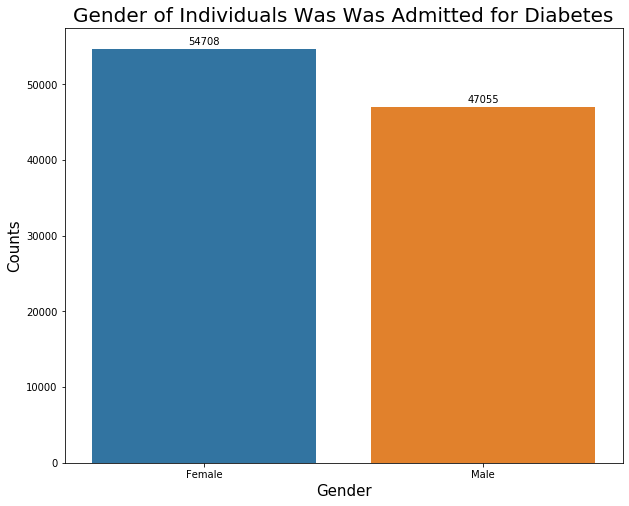

In [7]:
# Confirm that gender data is clean
all_data_new_df["gender"].unique()
all_data_new_df["gender"].value_counts()

# Given that there are 3 "Unknown/ Invalid" values in the column gender, we will drop those rows. 
all_data_new_df = all_data_new_df[all_data_new_df.gender != "Unknown/Invalid"]
all_data_new_df["gender"].value_counts()

print ("Difference between Male and Female is", 54708 - 47055)

fig,ax = plt.subplots(figsize = (10,8))
gender_plot = sns.countplot(all_data_new_df["gender"],ax = ax)
ax.set_title("Gender of Individuals Was Was Admitted for Diabetes",fontsize = 20)
ax.set_xlabel("Gender",fontsize = 15)
ax.set_ylabel("Counts",fontsize = 15)

for p in gender_plot.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 2),textcoords="offset points",ha='center', va='bottom') 

### 1.1 Analysis

As seen from the graph, the number of Males who have diabetes is much higher than the number of Females. The difference is **7653**.

## 2. Separating data by age


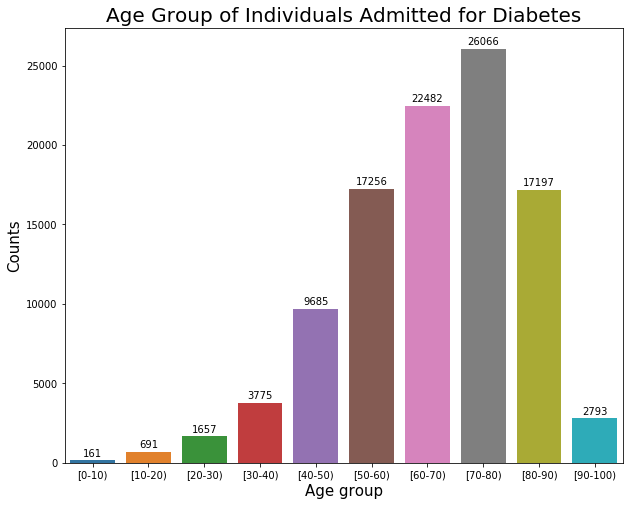

In [8]:
fig,ax = plt.subplots(figsize = (10,8))
age_plot = sns.countplot(all_data_new_df["age"],ax = ax)
ax.set_title("Age Group of Individuals Admitted for Diabetes",fontsize = 20)
ax.set_xlabel("Age group",fontsize = 15)
ax.set_ylabel("Counts",fontsize = 15)

for p in age_plot.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 2),textcoords="offset points",ha='center', va='bottom') 

### 2.1 Analysis

As seen from the graph, age group 70-80 comprises the most amount of people who have diabetes at **26068**.

## 3. Separating data by race


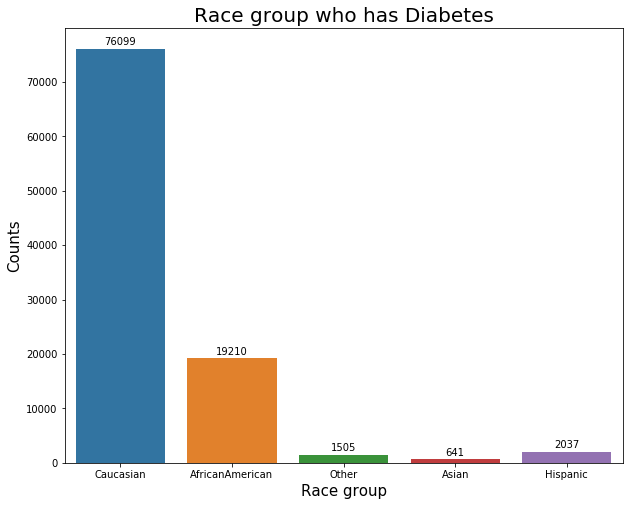

In [9]:
fig,ax = plt.subplots(figsize = (10,8))
race_plot = sns.countplot(all_data_new_df["race"],ax = ax)
ax.set_title("Race group who has Diabetes",fontsize = 20)
ax.set_xlabel("Race group",fontsize = 15)
ax.set_ylabel("Counts",fontsize = 15)

for p in race_plot.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 2),textcoords="offset points",ha='center', va='bottom') 

### 3.1 Analysis

As seen from the graph, Caucasians tops the race group who have diabetes at **76099**. The result is not surprising given that the dominant race in USA is Caucasian. <br>

However, it is  important to note that even though the data was taken from 130 hospitals to ensure even spread of data collection, the underlying population which the hospital serves could also play a part in how this data is skewed. As the data did not provide locations of the hospitals, the team is **unable to confirm** if the graph depicts an accurate representation of the race group that has diabetes. <br>

Nevertheless, for the purpose of this notebook, we will take it at face value and assume that the data is an accurate representation of the US population.

## --------------------------------------------------- 1/3-point Reflection -----------------------------------------------------

<div class="alert alert-info">
Through our analysis of 1 to 3, the team notes that the dominant race group of the population is Caucasian. While this is not surprising, the team shall focus our attention to this group of people (<b> Caucasians </b>) for a more focused project.
</div>

-----


## 4. Age group of Caucasian who has diabetes

Similar to earlier, the team first aims to identify the Age group of caucasians who have diabetes


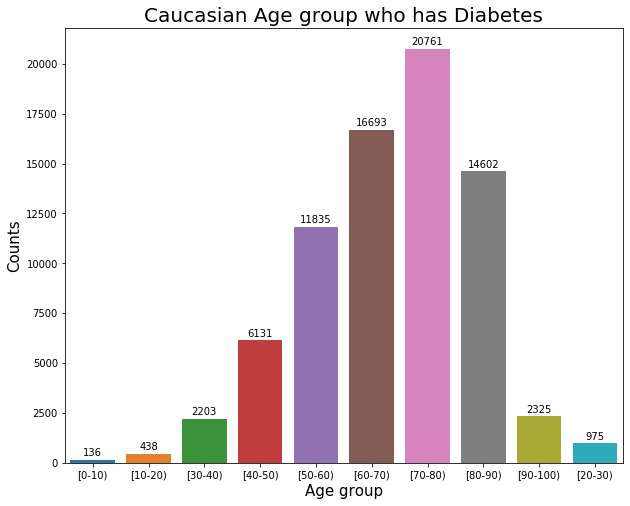

In [10]:
# Isolates Caucasian data
cond1 = all_data_new_df["race"].isin(["Caucasian"])
caucasian_df = all_data_new_df[cond1]

# Confirming that the data only contains Caucasian data
caucasian_df['race'].value_counts()

# Plotting the Causasian data
fig,ax = plt.subplots(figsize = (10,8))
caucasian_age_plot = sns.countplot(caucasian_df["age"],ax = ax)

ax.set_title("Caucasian Age group who has Diabetes",fontsize = 20)
ax.set_xlabel("Age group",fontsize = 15)
ax.set_ylabel("Counts",fontsize = 15)

for p in caucasian_age_plot.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 2),textcoords="offset points",ha='center', va='bottom') 

In [11]:
caucasian_df['age'].describe()

count       76099
unique         10
top       [70-80)
freq        20761
Name: age, dtype: object

### 4.1 Analysis

The shape of this graph is to be expected, with an increase from ages 0-10, and peaks at 70-80, similar to that of the overall data. This is due to the overwhelming caucasian data from the dataset. <br>

The mode of the data is 20761, which is represented by the 70-80 age group. This accounts to 27.3% of the Caucasian population sampled. <br>

## 5. Age group of Caucasian who has diabetes (Male vs Female)


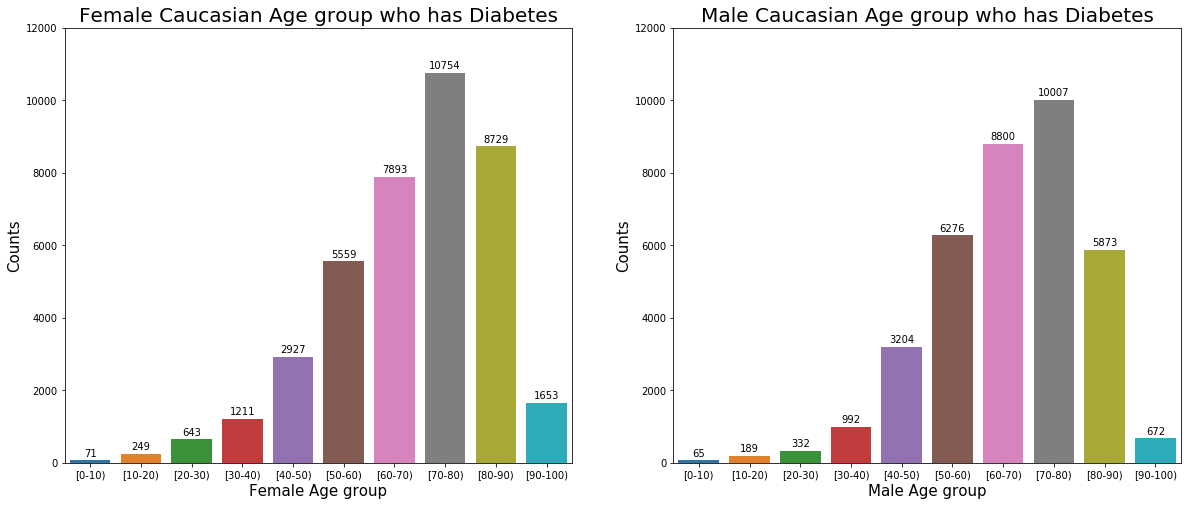

In [12]:
# Creating the 3 conditions for data grouping
cond1 = all_data_new_df["race"].isin(["Caucasian"])
cond2 = all_data_new_df["gender"].isin(["Male"])
cond3 = all_data_new_df["gender"].isin(["Female"])

# Grouped data by Race = Caucasian, and Gender = Male or Female
caucasian_male_df = all_data_new_df[cond1 & cond2]
caucasian_female_df = all_data_new_df[cond1 & cond3]

# Checking if data only contains Male or Female, but not both
caucasian_male_df['gender'].value_counts()
caucasian_female_df['gender'].value_counts()

# After grouping, the age categories are not in sequential order. This list arranges it in ascending order to be used
# later when plotting the grph
age_cat = ['[0-10)', '[10-20)', '[20-30)', '[30-40)','[40-50)','[50-60)','[60-70)', '[70-80)', '[80-90)','[90-100)']

# Creating 1 main plot with 2 subplots, one for Male, one for Female
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,8))
caucasian_female_age_plot = sns.countplot(caucasian_female_df ["age"],
                                          ax = ax1,
                                          order = age_cat
                                         )
caucasian_male_age_plot = sns.countplot(caucasian_male_df ["age"],
                                        ax = ax2,
                                        order = age_cat)

# Settling the details of the plot. Y Limits were set to ensure that both plots are represented in an equal fashion
ax1.set_title("Female Caucasian Age group who has Diabetes",fontsize = 20)
ax1.set_xlabel("Female Age group",fontsize = 15)
ax1.set_ylabel("Counts",fontsize = 15)
ax1.set(ylim=(0, 12000))

ax2.set_title("Male Caucasian Age group who has Diabetes",fontsize = 20)
ax2.set_xlabel("Male Age group",fontsize = 15)
ax2.set_ylabel("Counts",fontsize = 15)
ax2.set(ylim=(0, 12000))

for p in caucasian_female_age_plot.patches:
       ax1.annotate('{:.0f}'.format(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 2),textcoords="offset points",ha='center', va='bottom') 
for p in caucasian_male_age_plot.patches:
       ax2.annotate('{:.0f}'.format(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 2),textcoords="offset points",ha='center', va='bottom')         

plt.show()

### 5.1 Analysis

The trend seen is to be expected. As diabetes is a lifestyle disease, it tends to be more prominent in the older population. <br> <br>

One interesting point to note is that there seems to be many more Females in the final 2 age groups, 80-90 (1.49x more), and 90-100 (2.46x more). While intersting, the team chose to not pursue this finding.


## --------------------------------------------------- 2/3-point Reflection -----------------------------------------------------

<div class="alert alert-info">
Moving on to see if the data provided in the data is good for predicting readmission. 
</div>

-----


## 6. Preparing data for prediction

In [13]:
# display (all_data_new_df.head())

# to check for missing values
mvcE = pd.DataFrame({'Number of missing values': all_data_new_df.isnull().sum()})
mvcE[mvcE['Number of missing values'] > 0]
# display (mvcE)

# to drop all rows except caucasians
cond1 = all_data_new_df['race'] == 'Caucasian'
all_data_new_df = all_data_new_df[cond1]

# to drop rows with missing values
all_data_prep_df = all_data_new_df.dropna()
# display (all_data_prep_df)

# new dataset with no missing values
all_data_prep_df.to_csv("data_cleaned.csv", index=False)
# display(all_data_prep_df.head())



In [14]:
# inspect columns from the new dataset for unique values
column_list = all_data_prep_df.columns.tolist()
for item in column_list:
    print(item)
    print(all_data_prep_df[item].unique())

encounter_id
[   149190    500364     16680 ... 443854148 443857166 443867222]
patient_nbr
[ 55629189  82442376  42519267 ... 183087545 120975314 175429310]
race
['Caucasian']
gender
['Female' 'Male']
age
['[10-20)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)'
 '[90-100)' '[20-30)' '[0-10)']
admission_type_id
[1 2 3 6 4 5 8 7]
discharge_disposition_id
[ 1  3  6  2 11  5  7 25 10  4 14 18  8 13 12 17 16 22 23  9 20 15 24 28
 27 19]
admission_source_id
[ 7  2  4  1  5  6 20  3 17  8  9 10 22 11 25 13]
time_in_hospital
[ 3  2  1  4  5 13 12  7 10 11  6  9 14  8]
num_lab_procedures
[ 59  44  51  31  70  73  68  33  60  55  29  42  64  25  53  52  27  37
  46  41  47  28  36  48  72  10   2  65  67  58  45  57  32  75  83  34
  35  39  69  38  19  56  22  78  61  88  66  43   1  18  82  54  49  63
  50  71  11  77  81  76  93   3 103  13  80  62  85  16  12  30  24  23
  17  21  79  26  95  84  14  74  40 105  86  15  20   5   6  94   8   9
   7  89  92  96  97  87  98 102  9

In [15]:
# assign numbers to each race
def encode_race(x):
    if x == "Caucasian":
        return 1
    else:
        return 0

# assign numbers to gender
def encode_gender(x):
    if x == "Female":
        return 0
    else:
        return 1

# assign numbers to age group
def encode_age(x):
    if x == "[0-10)":
        return 0
    elif x == "[10-20)":
        return 1
    elif x == "[20-30)":
        return 2
    elif x == "[30-40)":
        return 3
    elif x == "[40-50)":
        return 4
    elif x == "[50-60)":
        return 5
    elif x == "[60-70)":
        return 6
    elif x == "[70-80)":
        return 7
    elif x == "[80-90)":
        return 8
    else:
        return 9
    
# def encode_mgs(x):
#     if x == "None":
#         return 0
#     elif x == "Norm":
#         return 1
#     elif x == ">200":
#         return 2
#     else:
#         return 3

# def encode_A1Cresult(x):
#     if x == "None":
#         return 0
#     elif x == "Norm":
#         return 1
#     elif x == ">7":
#         return 2
#     else:
#         return 3

# def encode_nsud(x):
#     if x == "No":
#         return 0
#     elif x == "Steady":
#         return 1
#     elif x == "Up":
#         return 2
#     else:
#         return 3

# def encode_change(x):
#     if x == "No":
#         return 0
#     else:
#         return 1

# def encode_diaMed(x):
#     if x == "No":
#         return 0
#     else:
#         return 1

In [16]:
#store encoded values into new columns in a same df 
all_data_prep_df['int_race'] = all_data_prep_df['race'].apply(encode_race)
all_data_prep_df['int_gender'] = all_data_prep_df['gender'].apply(encode_gender)
all_data_prep_df['int_age'] = all_data_prep_df['age'].apply(encode_age)
# all_data_prep_df['int_max_glu_serum'] = all_data_prep_df['max_glu_serum'].apply(encode_mgs)
# all_data_prep_df['int_A1Cresult'] = all_data_prep_df['A1Cresult'].apply(encode_A1Cresult)
# all_data_prep_df['int_change'] = all_data_prep_df['change'].apply(encode_change)
# all_data_prep_df['int_diabetesMed'] = all_data_prep_df['diabetesMed'].apply(encode_diaMed)

# Encode values with 'No', 'Steady', 'Up', 'Down'
# sel_col = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
#            'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
#            'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin','glipizide-metformin',
#            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

# for col in sel_col:
#      new_name = "int_" + col
#      all_data_prep_df[new_name] = all_data_prep_df[col].apply(encode_nsud)

all_data_prep_df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,int_race,int_gender,int_age
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Ch,Yes,>30,1,0,1
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Ch,Yes,NO,1,1,3
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Ch,Yes,NO,1,1,4
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,No,Yes,>30,1,1,5
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,No,No,No,Ch,Yes,NO,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,76,...,No,No,No,No,Ch,Yes,NO,1,0,8
101759,443842778,86472243,Caucasian,Male,[80-90),1,1,7,1,1,...,No,No,No,No,Ch,Yes,NO,1,1,8
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,No,No,Ch,Yes,NO,1,1,7
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,No,No,Ch,Yes,NO,1,0,8


In [17]:
# x_df for things that can affect readmission
# an altertive analysis could be to use drugs to see if being on a particular medication can affect your 
# readmission rate. However, we decided against it

x_df = all_data_prep_df[["admission_source_id","admission_type_id", "int_age", "int_gender",
                         "time_in_hospital", "num_lab_procedures", "num_medications", "number_diagnoses"]] 
display(x_df.head())


y_df = all_data_prep_df[['readmitted']] #target should be readmitted only 
display(y_df.head())


,admission_source_id,admission_type_id,int_age,int_gender,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses
1,7,1,1,0,3,59,18,9
3,7,1,3,1,2,44,16,7
4,7,1,4,1,1,51,8,5
5,2,2,5,1,3,31,16,9
6,2,3,6,1,4,70,21,7


,readmitted
1,>30
3,NO
4,NO
5,>30
6,NO


In [18]:
print(set(y_df))
print(x_df.shape, y_df.shape)

{'readmitted'}
(75086, 8) (75086, 1)


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, 
                                                    y_df, 
                                                    test_size=0.2, 
                                                    random_state=5)

print(x_train.shape, x_test.shape)

(60068, 8) (15018, 8)


## 7. Model Creation

Two tree depth will be created and to accessed by looking into the accuracy rate, the better model will then be used for decision making. 

In [20]:
# big tree
from sklearn.tree import DecisionTreeClassifier 

big_diabetes_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=5)
big_diabetes_dtree.fit(x_train, y_train)
print("Depth of tree=", big_diabetes_dtree.tree_.max_depth)

Depth of tree= 10


In [21]:
# pruned trees
pruned_diabetes_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=5)
pruned_diabetes_dtree.fit( x_train, y_train )
print("Depth of Pruned tree=", pruned_diabetes_dtree.tree_.max_depth)

Depth of Pruned tree= 5


[Text(520.2200059420916, 1037.7818181818182, 'X[7] <= 5.5\nentropy = 1.374\nsamples = 60068\nvalue = [6833, 21529, 31706]'),
 Text(272.66251620570443, 938.9454545454546, 'X[0] <= 6.5\nentropy = 1.229\nsamples = 10370\nvalue = [855, 2937, 6578]'),
 Text(166.5831352636128, 840.1090909090909, 'X[0] <= 2.5\nentropy = 1.144\nsamples = 5463\nvalue = [413, 1289, 3761]'),
 Text(98.47590751944685, 741.2727272727273, 'X[5] <= 27.5\nentropy = 1.179\nsamples = 4295\nvalue = [318, 1134, 2843]'),
 Text(51.4232929991357, 642.4363636363637, 'X[4] <= 3.5\nentropy = 1.094\nsamples = 1406\nvalue = [94, 313, 999]'),
 Text(27.610630942091618, 543.6, 'X[5] <= 14.5\nentropy = 1.012\nsamples = 1104\nvalue = [58, 227, 819]'),
 Text(14.709593777009507, 444.76363636363635, 'X[6] <= 12.5\nentropy = 1.071\nsamples = 625\nvalue = [32, 152, 441]'),
 Text(7.716508210890233, 345.9272727272727, 'X[5] <= 12.5\nentropy = 1.164\nsamples = 330\nvalue = [21, 92, 217]'),
 Text(3.8582541054451167, 247.09090909090912, 'X[4] <=

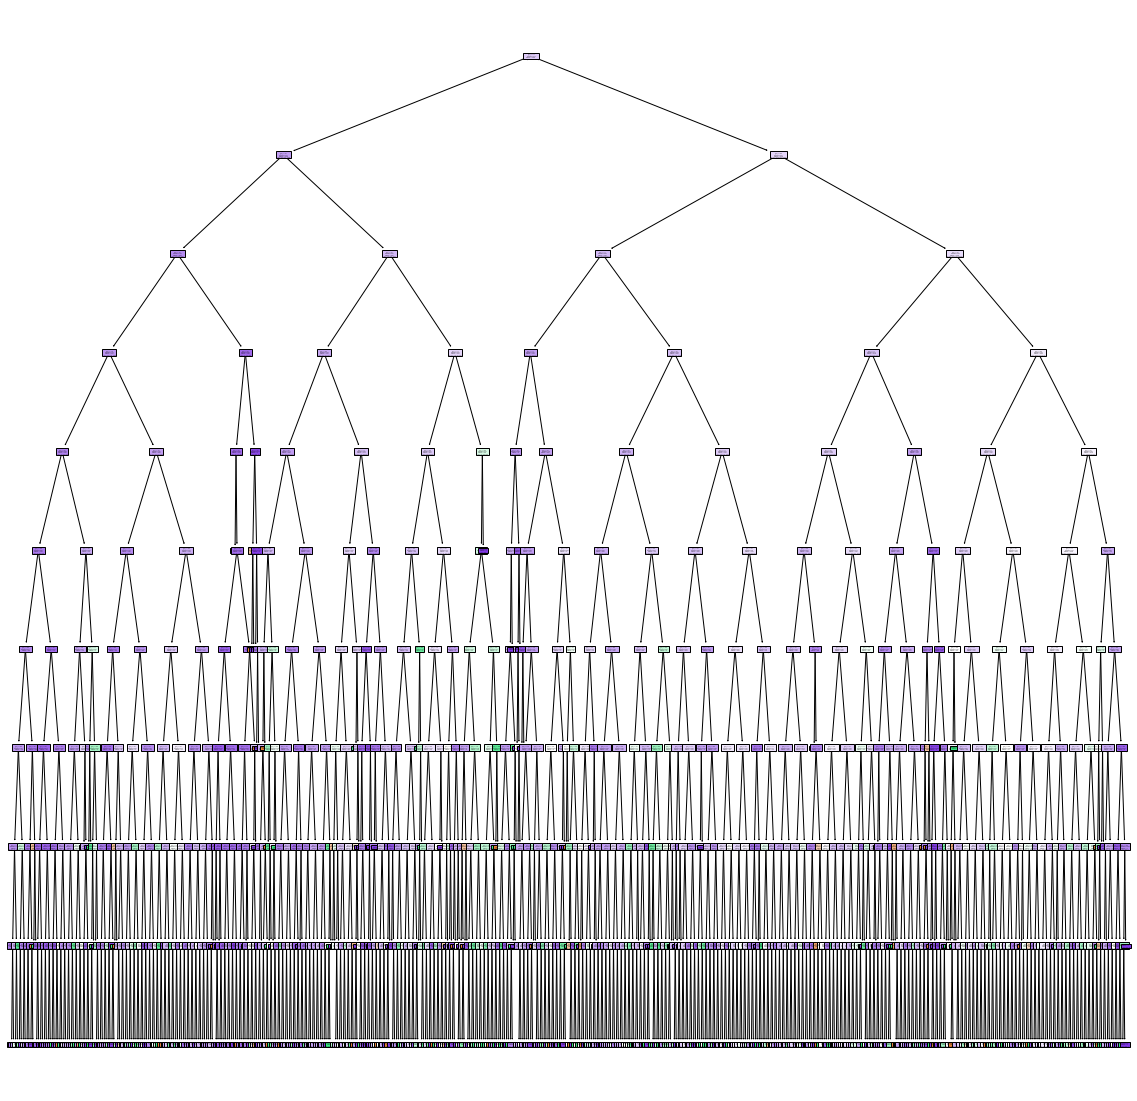

In [22]:
from sklearn import tree
from matplotlib.pyplot import figure

figure(figsize=(20,20))
tree.plot_tree(big_diabetes_dtree, filled=True, impurity=True)

[Text(558.0, 996.6, 'X[7] <= 5.5\nentropy = 1.374\nsamples = 60068\nvalue = [6833, 21529, 31706]'),
 Text(279.0, 815.4000000000001, 'X[0] <= 6.5\nentropy = 1.229\nsamples = 10370\nvalue = [855, 2937, 6578]'),
 Text(139.5, 634.2, 'X[0] <= 2.5\nentropy = 1.144\nsamples = 5463\nvalue = [413, 1289, 3761]'),
 Text(69.75, 453.0, 'X[5] <= 27.5\nentropy = 1.179\nsamples = 4295\nvalue = [318, 1134, 2843]'),
 Text(34.875, 271.79999999999995, 'X[4] <= 3.5\nentropy = 1.094\nsamples = 1406\nvalue = [94, 313, 999]'),
 Text(17.4375, 90.59999999999991, 'entropy = 1.012\nsamples = 1104\nvalue = [58, 227, 819]'),
 Text(52.3125, 90.59999999999991, 'entropy = 1.327\nsamples = 302\nvalue = [36, 86, 180]'),
 Text(104.625, 271.79999999999995, 'X[1] <= 2.5\nentropy = 1.215\nsamples = 2889\nvalue = [224, 821, 1844]'),
 Text(87.1875, 90.59999999999991, 'entropy = 1.156\nsamples = 1185\nvalue = [95, 278, 812]'),
 Text(122.0625, 90.59999999999991, 'entropy = 1.246\nsamples = 1704\nvalue = [129, 543, 1032]'),
 Tex

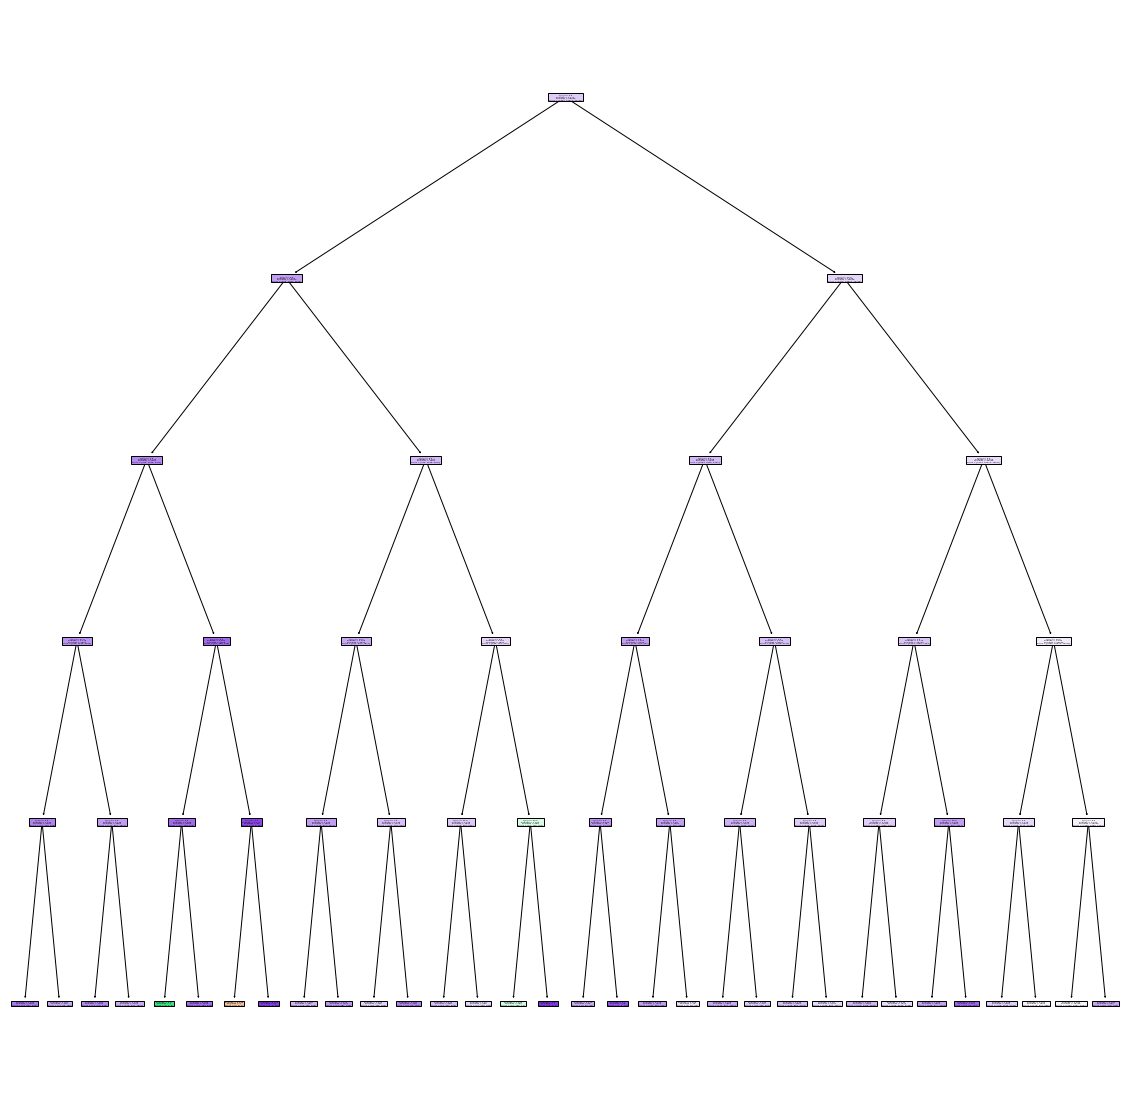

In [23]:
figure(figsize=(20,20))
tree.plot_tree(pruned_diabetes_dtree, filled=True, impurity=True)

<div class="alert alert-success">

* You could zoom in on particular parts of the tree to make it clearer to see, or interpret some of the rules of the tree.
</div>
    

In [24]:
# to test the full and pruned tree, results showing whether "<30" if patient readmitted in less than 30 days, >30" if patient readmitted in more than 30 days and "NO" if there is no record of readmission

big_results = big_diabetes_dtree.predict(x_test)  
print("Big tree predictions:")
print(big_results)

print("-------" * 10)

pruned_results = pruned_diabetes_dtree.predict(x_test)  
print("Pruned tree predictions:")
print(pruned_results)

Big tree predictions:
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']
----------------------------------------------------------------------
Pruned tree predictions:
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [25]:
# confusion matrix to test the performance of big and pruned tree

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_f = confusion_matrix(y_test, big_results)
cm_p = confusion_matrix(y_test, pruned_results)

print("Big Tree:\n",cm_f) 
print("Pruned Tree:\n", cm_p)

Big Tree:
 [[   6  276 1399]
 [  21  926 4399]
 [  41  973 6977]]
Pruned Tree:
 [[   0    7 1674]
 [   0   24 5322]
 [   1   29 7961]]


Confusion matrix (Big tree)
[[   6  276 1399]
 [  21  926 4399]
 [  41  973 6977]]
Confusion matrix (Pruned Tree)
[[   0    7 1674]
 [   0   24 5322]
 [   1   29 7961]]


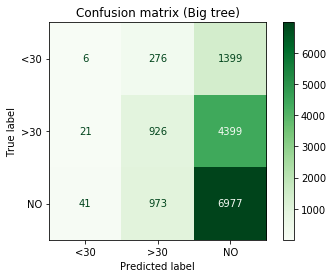

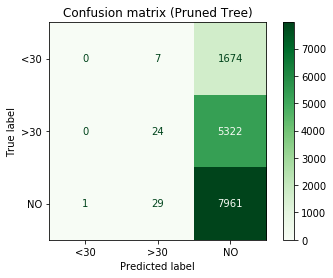

In [26]:
# plotting confusion matrix

from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix (Big tree)", big_diabetes_dtree),
                  ("Confusion matrix (Pruned Tree)", pruned_diabetes_dtree)]

for title, classifier in titles_options:
    
    # note plot_confusion_matrix - don't have to predict, it will do for you
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Greens,values_format = "d",
                                 normalize=None)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

## 8. Evaluation of Model

Big tree accuracy 0.5266347050206419
Pruned tree accuracy 0.5316952989745638


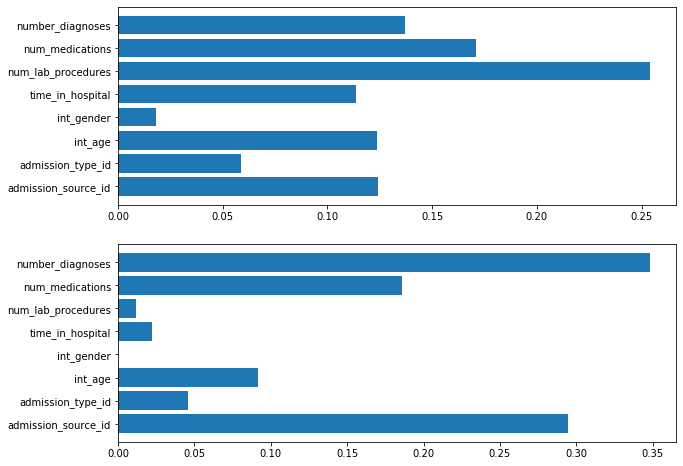

In [27]:
# to get the accuracy score of both tree
print("Big tree accuracy", big_diabetes_dtree.score(x_test, y_test))
print("Pruned tree accuracy", pruned_diabetes_dtree.score(x_test, y_test))

col_list = x_df.columns.tolist()
fig, ax = plt.subplots(nrows=2, figsize = (10,8))

ax[0].barh(col_list, big_diabetes_dtree.feature_importances_)
ax[1].barh(col_list, pruned_diabetes_dtree.feature_importances_)

plt.show()

### 8.1 Analysis

From the accuracy rate,it shows that there are minimum difference between both Big tree and Pruned Tree. Due to high computational load, the team was unable to use the full tree for this analysis.

<b> Big tree </b><br>
Overall Accuracy = 52.66% <br>
Accuracy for "NO" = 87.31% <br>
Accuracy for "<30" = 0.36% <br>
Accuracy for ">30" = 17.32% <br>
		
Hit Rate for "NO" = 54.74% <br>
Hit Rate for "<30" = 8.82% <br>
Hit Rate for ">30" = 42.57% <br>

<b> Small tree </b><br>
Overall Accuracy = 53.17% <br>
Accuracy for "NO" = 99.62% <br>
Accuracy for "<30" = 0% <br>
Accuracy for ">30" = 0.45% <br>
		
Hit Rate for "NO" = 53.23% <br>
Hit Rate for "<30" = 0% <br>
Hit Rate for ">30" = 40% <br>

<br>
Both predictive importance bar charts display the predictive importance of the independent variables. It shows the importance of a variable in predicting whether a patient is likely to either be readmitted or not. The most important predictor for the Big Tree is the Number of Lab Procedures, while the Number of Diagnoses was the most important predictor for the Pruned Tree. 

It is interesting to note that in the Pruned Tree, the number of lab procedures performed plays a small role in the prediction, while this is the most important factor for the Big Tree. 

However, given that the accuracy, precision, specificity and sensititivty of this model hovers around the 50 - 60% range, the model would need to be improved before it can be deployed in the field for live testing. 
<br> <br>

## 9. Conclusion

The team had looked at a diabetes dataset from the UCI Machine Learning Database. 

Post cleaning of the data, the team looked ant how 1) Gender, 2) Age, and 3) Race manifested in the dataset. We observed similar numbers of males and females affected by diabetes, an increase in hospital admissions as the age brackets went up till 70-80, and that the dataset belonged predominantly to the Caucasian race. 

As Caucasians were the main group of people, the team redid the preliminary analysis on just Caucasians to view how gender and age manifested, and results indicated distinct similarities with the original data.

Moving forward, the team tried to develop a predictive model to determine readmission rates. However, as the accuracy of the model was less than 60%, further finetuning is required before it can be ready for field testing.

<div class="alert alert-success">
<li>The dataset is imbalanced, hence as "NO" class dominates the data
<li>You can consider sampling techniques to balance out the training set
<li>E.g. oversampling the minority classes, SMOTE, etc
</div>